# Amazon Best Seller Gaming PC Mice Analysis

### Background

This analysis project is centered around exploring a dataset that contains information about the best-selling PC gaming mice on Amazon. Given the increasing demand for gaming peripherals and the myriad of choices available in the market, uncovering patterns in the best sellers presents an intriguing endeavor.

#### Primary objectives of this analysis include:
- Data Cleaning (Ensuring the integrity of the dataset is crucial. I'll refine the data using Python regular expressions to guarantee its consistency, accuracy, and reliability.)
- Descriptive Analysis (I'll use the describe() function to gain an initial understanding of the data's distribution and key statistics.)
- Value Counts: (This step involves examining the frequency of categorical data. It will provide insights into which brands or colors dominate the top 100 list.)

- Data Visual Exploration
    - Distribution Visualization (This will shed light on how various data are distributed.)
    - Regression Plots (These plots will help in identifying relationships and dependencies between different data.)
    - Cluster Analysis (A deeper dive to pinpoint inherent groupings within the data.)
    - Scatter Plots (Focusing especially on the top 5 brands, we aim to discern unique patterns.)

### Importing The Necessary Libraries

In [110]:
import re  # For regular expression operations
import pandas as pd  # Data manipulation and analysis
import seaborn as sns  # Data visualization based on matplotlib
import matplotlib.pyplot as plt  # Plotting library
from sklearn.cluster import KMeans  # KMeans clustering algorithm
from sklearn.metrics import silhouette_score  # Evaluate the quality of clusters

### Data Loading

Loading the Dataset from CSV and create a Pandas DataFrame from it.

In [111]:
# Load the data from the csv file into a dataframe
df = pd.read_csv(r'output\amazon_product_data.csv')

### Initial Data Exploration

Doing initial data exploration by using the head(), info() methods, .shape, and .duplicated().sum() to check out the dataframe's columns, variables types, number of rows/columns, etc.

In [112]:
# Print the first 5 rows of the dataframe
df.head()

,asin,title,rank,price,rating_volume,offers,offers_bool,rating,Brand,Color,...,Connectivity technologies,Special features,Other display features,Whats in the box,Standing screen display size,Language,Package Dimensions,Voltage,Wireless Type,Number of Processors
0,B07GBZ4Q68,Logitech G502 HERO High Performance Wired Gami...,1,40.79,49152,0.0,False,4.7,Logitech G,Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B0BR5MJQ6W,Vaydeer Ultra Slim Mouse Mover with Adjustable...,2,21.99,4140,0.0,False,4.5,Vaydeer,dark blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B094PS5RZQ,Razer DeathAdder Essential Gaming Mouse: 6400 ...,3,24.40,8514,0.0,False,4.4,Razer,Classic Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B07CMS5Q6P,Logitech G305 LIGHTSPEED Wireless Gaming Mouse...,4,39.95,26809,0.0,False,4.6,Logitech G,Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B087Q7V2BV,"LeadsaiL Wireless Computer Mouse, 2.4G Portabl...",5,39.95,3655,0.0,False,4.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Printing dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   asin                             100 non-null    object 
 1   title                            100 non-null    object 
 2   rank                             100 non-null    int64  
 3   price                            100 non-null    float64
 4   rating_volume                    100 non-null    int64  
 5   offers                           100 non-null    float64
 6   offers_bool                      100 non-null    bool   
 7   rating                           100 non-null    float64
 8   Brand                            79 non-null     object 
 9   Color                            77 non-null     object 
 10  Connectivity Technology          71 non-null     object 
 11  Special Feature                  77 non-null     object 
 12  Movement Detection Tech

In [114]:
# Print the shape
df.shape

(100, 48)

In [115]:
# Check for duplicates
df.duplicated().sum()

0

Key Takeaways:
- The dataset contains 100 rows and 48 columns.
- Alot of the columns contain null values.
- Data does not contain duplicates.

### Data Cleaning

- Cleaning the Data by Removing Unnecessary Columns, Other columns are drop because not relevant or too many null values
- Removing rows that are not relevant to the analysis. Like row containg the word superglide, jiggler, and mousepad. Which are not gaming mice products.

In [116]:
# List of columns to keep for analysis.
columns_to_keep = ['asin', 'title', 'rank', 'price', 'rating_volume', 'rating', 'Brand', 'Color', 'Special Feature', 'Manufacturer']
df = df[columns_to_keep]
print(df) # Print the dataframe to check if the columns are kept

          asin                                              title  rank  \
0   B07GBZ4Q68  Logitech G502 HERO High Performance Wired Gami...     1   
1   B0BR5MJQ6W  Vaydeer Ultra Slim Mouse Mover with Adjustable...     2   
2   B094PS5RZQ  Razer DeathAdder Essential Gaming Mouse: 6400 ...     3   
3   B07CMS5Q6P  Logitech G305 LIGHTSPEED Wireless Gaming Mouse...     4   
4   B087Q7V2BV  LeadsaiL Wireless Computer Mouse, 2.4G Portabl...     5   
..         ...                                                ...   ...   
95  B0952T78F7  Honeycomb Wired Gaming Mouse, RGB Backlight an...    96   
96  B01M2U8JU9  FIRSTBLOOD ONLY GAME. AJ52 Watcher RGB Gaming ...    97   
97  B07MGDRBBF  Glorious Gaming Mouse - Model O Matte White 67...    98   
98  B08564NLZG  Razer Basilisk Ultimate HyperSpeed Wireless Ga...    99   
99  B09X6PP4XX  Superglide - Fastest and Smoothest Mouse Feet/...   100   

    price  rating_volume  rating       Brand          Color  \
0   40.79          49152     4.7  Lo

In [117]:
# Words to check for cleaning the dataframe
words_to_check = ["Superglide", "Jiggler", "Mouse Pad"]
# Create a combined regex pattern
pattern = '|'.join(words_to_check)

# Drop rows where 'text_column' contains any of the words in the list
df = df[~df['title'].str.contains(pattern)]

# Print the shape
df.shape

(87, 10)

Key Takeaways:
- After cleaning the data, the dataset contains 87 rows and 10 columns.
- List of words to check was collected by looking at the amazon website and seeing what products were not gaming mice. (The method may not be applicable to larger datasets.)
- For larger datasets, a more efficient method would be to use collect product categories and use that to filter out the data, matches keyword like Gaming mouse and check product that does not contain the keyword, using item series to check it on internet with python automation and webscraping tools, or if applicalicable, use a machine learning model to classify the data.

### Descriptive Analysis of Price, Rating, and Rating Volume

Using the describe() function to gain an initial understanding of the data's distribution and key statistics specifically for the price, rating, and rating volume columns.

In this analysis, because lacking of sales data, we will use the rating volume as a proxy for sales volume.

In [118]:
# Describe the price, rating_volume, and rating columns
df[['price', 'rating_volume', 'rating']].describe()

,price,rating_volume,rating
count,87.000000,87.000000,87.000000
mean,48.637471,7429.137931,4.508046
std,35.780056,8905.264918,0.146445
min,5.990000,37.000000,4.100000
25%,19.990000,1291.500000,4.450000
50%,39.950000,3784.000000,4.500000
75%,69.490000,11472.000000,4.600000
max,148.990000,49152.000000,4.700000


Key Takeaways:
- The average price of the amazon best seller gaming mice is $48.63.
- The average rating of the amazon best seller gaming mice is 4.5
- The average rating volume of the amazon best seller gaming mice is 7429.
- The cheapest gaming mice is $5.99 and the most expensive gaming mice is $148.99.
- The lowest rating is 4.1 and the highest rating is 4.7, it could be said the product need to have a rating of 4.1 and above to be considered as a best seller.
- As the lowest rating volume is 37 and the highest rating volume is 49,000, The range of rating volume is very large.
- From the this data, we can see the only consistent pattern for the best seller gaming mice is the rating. Make it a good indicator for the best seller gaming mice are the rating of the product. While the price could be groupped into 3 categories, which are low, medium, and high price. As for now the rating volume we could not draw strong conclusion from it, as we need to do further analysis like clustering and regression analysis.

#### Data Cleaning & Value Counts of PC Gaming Mice Colors

Counting the number of colors that dominate the best seller list. Start by using the value_counts() function to get a frequency of the colors. 

In [119]:
# Count the number of unique values in color column
df['Color'] = df['Color'].str.title() # Capitalize the first letter of each word
df['Color'].value_counts()

Color
Black                            40
Classic Black                    10
White                             4
Mercury White                     2
Mint Green                        2
Gray                              1
Blue                              1
White-Sm600 Plus                  1
Matte Black                       1
Black Rechargeable-Right Hand     1
Blue, Black                       1
Blue&Pink                         1
Matte White                       1
Black-Sm600 Plus                  1
Name: count, dtype: int64

We saw that some of the colors are not consistent, for example, black and black matte. We will clean the data and make it consistent. Then we will use explode() function to explode the color column to make it easier to analyze. Finally, we will use the value_counts() function again to get the frequency of the colors. Then using for loop to get it with the percentage.

In [120]:
# Dictionary of string replacements to perform on the Color column
replacements = {
    'Classic ': '',
    'Mercury ': '',
    'Mint ': '',
    'Dark ': '',
    '-Sm600 Plus': '',
    'Matte ': '',
    ' Rechargeable-Right Hand': '',
    '&': ', ',
}
# Replace using dictionary
df['Color'] = df['Color'].replace(replacements, regex=True)
# Flatten the lists using explode
flattened_color = df['Color'].str.split(', ').explode().reset_index(drop=True)
# Perform value_counts on the flattened data and calculate the percentages
color_counts = flattened_color.value_counts()
color_percentages = (color_counts / color_counts.sum() * 100).round(2)

# Print results with counts and percentages
for color, count in color_counts.items():
    print(f"{color}: {count} ({color_percentages[color]}%)")


Black: 54 (78.26%)
White: 8 (11.59%)
Blue: 3 (4.35%)
Green: 2 (2.9%)
Gray: 1 (1.45%)
Pink: 1 (1.45%)


Key Takeaways:
- The most popular color for the best seller gaming mice is black, followed by white, and blue.
- Black color mouse is 5 times more popular than second place which is white color mouse.

#### Data Cleaning & Value Counts of PC Gaming Mice Special Features

Counting the number of Special Features that dominate the best seller list. Start by using the value_counts() function to get a frequency of the Special Features.

In [121]:
# Capitalize the first letter of each word in the Special Feature column
df['Special Feature'] = df['Special Feature'].str.title()
# Flatten the lists
flattened_features = df['Special Feature'].str.split(', ').explode().reset_index(drop=True)
# Perform value_counts on the flattened data
flattened_features.value_counts()

Special Feature
Wireless                 33
Programmable Buttons     31
Lightweight              25
Ergonomic Design         20
Portable                 16
                         ..
8K Hz Hyperpolling        1
Water Resistant           1
1…                        1
Rechargeble               1
Key Slider Side Panel     1
Name: count, Length: 66, dtype: int64

Standardizing the Special Features names using regex and flattened the list by using explore(). Then, we'll use the value_counts() function again to get a frequency of the Special Features. Also using for loop to get its percentage.

In [122]:
# Function to do multiple replacements using re.sub()
def multiple_replacements(text):
    # Check if the text is not NaN
    if pd.notna(text):
        text = re.sub(r'^.*Ergonomic.*', 'Ergonomic Design', text)
        text = re.sub(r'^.*Programmable Buttons.*', 'Programmable Buttons', text)
        text = re.sub(r'^.*Programmable Gaming.*', 'Programmable Buttons', text)
        text = re.sub(r'^.*Optical Sensor.*', 'High-Precision Optical Sensor', text)
        text = re.sub(r'^.*Lightweight.*', 'Lightweight', text)
        text = re.sub(r'^.*Lighteweight.*', 'Lightweight', text)
        text = re.sub(r'^.*Wireless.*', 'Wireless', text)
        text = re.sub(r'^.*Rgb.*', 'Customizable RGB', text)
        text = re.sub(r'^.*Fast Optical Switches.*', 'Fast Optical Switches', text)
        text = re.sub(r'^.*Fast Optic.*', 'Fast Optical Switches', text)
        text = re.sub(r'^.*Led Lights.*', 'LED Lights', text)
        text = re.sub(r'^.*Rechargeble.*', 'Rechargeable', text)
        text = re.sub(r'^.*Battery.*', 'Long Battery Life', text)
    return text
# Apply the function to the Special Feature column
flattened_features = flattened_features.apply(multiple_replacements)

# Perform value_counts on the flattened data and calculate the percentages
features_counts = flattened_features.value_counts()
features_percentages = (features_counts / features_counts.sum() * 100).round(2)

# Print results with counts and percentages
for feature, count in features_counts.items():
    print(f"{feature}: {count} ({features_percentages[feature]}%)")


Programmable Buttons: 43 (17.2%)
Wireless: 39 (15.6%)
Lightweight: 32 (12.8%)
Ergonomic Design: 28 (11.2%)
Portable: 16 (6.4%)
High-Precision Optical Sensor: 15 (6.0%)
Customizable RGB: 13 (5.2%)
LED Lights: 9 (3.6%)
Rechargeable: 7 (2.8%)
Long Battery Life: 6 (2.4%)
Fast Optical Switches: 6 (2.4%)
Ultralight Honeycomb Design: 4 (1.6%)
Touch Scroll: 4 (1.6%)
Back & Forward Buttons: 3 (1.2%)
3 Dpi Levels (800/1200/1600): 3 (1.2%)
Back/Forward Buttons: 2 (0.8%)
Drag-Free Paracord: 2 (0.8%)
Hyperscroll Tilt Wheel: 2 (0.8%)
2.4 Ghz Transmission Technology: 2 (0.8%)
Onboard Memory: 2 (0.8%)
Noiseless: 2 (0.8%)
Esports-Grade Performance: 1 (0.4%)
Key Slider Side Panel: 1 (0.4%)
Water Resistant: 1 (0.4%)
8K Hz Hyperpolling: 1 (0.4%)
1…: 1 (0.4%)
无线: 1 (0.4%)
Fire Button: 1 (0.4%)
Adjustable Dpi 8000: 1 (0.4%)
Durable: 1 (0.4%)
Back & Forward Buttonswireless: 1 (0.4%)


Key Takeaways:
- There are 4 Special Features that dominate the best seller list make up 50% of the special features. Which are Programmable buttons, Wireless, Lightweight, and Ergonomic Design.

#### Data Cleaning & Value Counts of PC Gaming Mice Brands

Cleaning the brand column and manufacturer start by capitalizing the first letter of each word in the brand column. Then if the brand column null then fill it with the manufacturer column. Then, we'll use the value_counts() function again to get a frequency of the brand. Use for loop to get it along its precentage

In [123]:
# Capitalize the first letter of each word in the Brand column
df['Brand'] = df['Brand'].str.title()

# Capitalize the first letter of each word in the Manufacturer column
df['Manufacturer'] = df['Manufacturer'].str.title()

# If Brand is null and Manufacturer is not null, then Brand = Manufacturer
df.loc[df['Brand'].isnull() & df['Manufacturer'].notnull(), 'Brand'] = df['Manufacturer']

# Standardize logitech brand
replacements = {
    'Logitech G': 'Logitech',
}

# Replace using dictionary
df['Brand'] = df['Brand'].replace(replacements, regex=True)

# Value counts of the Brand column and calculate the percentages
brand_counts = df['Brand'].value_counts()
brand_percentages = (brand_counts / brand_counts.sum() * 100).round(2)

# Print results with counts and percentages
for brand, count in brand_counts.items():
    print(f"{brand}: {count} ({brand_percentages[brand]}%)")


Razer: 21 (30.0%)
Redragon: 10 (14.29%)
Logitech: 9 (12.86%)
Trueque: 4 (5.71%)
Corsair: 4 (5.71%)
Glorious Pc Gaming Race: 3 (4.29%)
Solakaka: 2 (2.86%)
Hyperx: 2 (2.86%)
Tmkb Technology Mechanical Keyboard: 1 (1.43%)
Anker: 1 (1.43%)
Steelseries: 1 (1.43%)
Dierya: 1 (1.43%)
Asoyiol: 1 (1.43%)
Asus: 1 (1.43%)
Weemsbox: 1 (1.43%)
Uhuru: 1 (1.43%)
T-Dagger: 1 (1.43%)
Versiontech.: 1 (1.43%)
Vassink: 1 (1.43%)
Lodvie: 1 (1.43%)
Utechsmart: 1 (1.43%)
Bengoo: 1 (1.43%)
E-Yooso: 1 (1.43%)


### Descriptive Analysis of Price, Rating, and Rating Volume by Brand

Use value_counts() to get brands with more than 3 products in the best seller list. Create new column based brands with more than 3 products in the top 100 list, containing their price, rating, and rating volume.

In [124]:
# Getting values that have a count greater than 3
brand_with_count_gt_3 = df['Brand'].value_counts()
brand_list = brand_with_count_gt_3[brand_with_count_gt_3 > 3].index.tolist()
print(brand_list) # Print the list

# Function to create new columns based on brand with count greater than 3
def brand_column(brand):
    # Create the new column based on string value condition
    df[f'rating_{brand}'] = df.loc[df['Brand'] == f'{brand}', 'rating']
    df[f'price_{brand}'] = df.loc[df['Brand'] == f'{brand}', 'price']
    df[f'rating_volume_{brand}'] = df.loc[df['Brand'] == f'{brand}', 'rating_volume']
# Loop through the list of brands and apply the function
for brand in brand_list:
    brand_column(brand)

['Razer', 'Redragon', 'Logitech', 'Trueque', 'Corsair']


As we get the brands with more than 3 products in the best seller list, we will use the describe() function to get a summary of the price, rating, and rating volume of each brand.

In [125]:
# Describe Price, Rating Volume, and Rating columns of Razer brand
df[[f'rating_Razer', f'price_Razer', f'rating_volume_Razer']].describe()


,rating_Razer,price_Razer,rating_volume_Razer
count,21.000000,21.000000,21.000000
mean,4.547619,75.629048,11682.190476
std,0.087287,36.755715,9172.443282
min,4.300000,24.400000,308.000000
25%,4.500000,49.870000,3784.000000
50%,4.600000,69.990000,9151.000000
75%,4.600000,96.100000,19724.000000
max,4.700000,148.990000,34263.000000


Key Takeaways:
- The average rating of Razer is 4.5, which is around the average rating of the best seller gaming mice.
- The average price of Razer is $75.62, which put it in the high price category. Also the most expensive mouse belong to razor.
- The average rating volume of Razer is 11,682, make it barely on the 75th percentile of the best seller gaming mice.

In [126]:
# Describe Price, Rating Volume, and Rating columns of Redragon brand
df[[f'rating_Redragon', f'price_Redragon', f'rating_volume_Redragon']].describe()

,rating_Redragon,price_Redragon,rating_volume_Redragon
count,10.000000,10.000000,10.000000
mean,4.550000,28.376000,7907.700000
std,0.070711,10.494452,9775.287152
min,4.500000,15.990000,485.000000
25%,4.500000,19.990000,798.000000
50%,4.500000,26.440000,2932.500000
75%,4.600000,32.730000,12277.000000
max,4.700000,46.990000,30574.000000


Key Takeaways:
- The average rating of Redragon is 4.5, which is around the average rating of the best seller gaming mice. Also one of the highest rated mouse belong to Redragon with 4.7 rating.
- The average price of Redragon is $28, which put it in the low price category. Even its expensive mouse is barely surpasses the average price of the best seller gaming mice.
- For its rating volume, Redragon is on the average rating volume of the best seller gaming mice with 7,907 rating volume.

In [127]:
# Describe Price, Rating Volume, and Rating columns of Logitech brand
df[[f'rating_Logitech', f'price_Logitech', f'rating_volume_Logitech']].describe()

,rating_Logitech,price_Logitech,rating_volume_Logitech
count,9.000000,9.000000,9.000000
mean,4.644444,74.130000,16241.555556
std,0.072648,34.531668,14410.555377
min,4.500000,26.770000,1281.000000
25%,4.600000,40.790000,6501.000000
50%,4.700000,72.950000,13326.000000
75%,4.700000,107.500000,16908.000000
max,4.700000,122.890000,49152.000000


Key Takeaways:
- The average rating of logitech is 4.6, which make it the highest average rating among top 5 brands. Logitech also have one of the highest rated mouse with 4.7 rating.
- The average price of logitech is $74.13, which put it in the high price category. Also make it same price category as razor.
- The average rating volume of logitech is 16,241, make it highest rating volume among top 5 brands. Also the highest rating volume belong to logitech with 49,000 rating volume.

In [128]:
# Describe Price, Rating Volume, and Rating columns of Trueque brand
df[['rating_Trueque', 'price_Trueque', 'rating_volume_Trueque']].describe()


,rating_Trueque,price_Trueque,rating_volume_Trueque
count,4.000,4.000000,4.000000
mean,4.575,9.490000,2271.500000
std,0.050,3.316625,889.656675
min,4.500,5.990000,1471.000000
25%,4.575,8.240000,1894.000000
50%,4.600,8.990000,2035.000000
75%,4.600,10.240000,2412.500000
max,4.600,13.990000,3545.000000


Key Takeaways:
- The average rating of Trueque is 4.5, which is around the average rating of the best seller gaming mice.
- The average price of Trueque is $9,5, which put it in low price category. Also the cheapest mouse belong to Trueque. Even its most expensive mouse still in the low price category by around $6.
- The average rating volume of Trueque is 1,000, make it lowest rating volume average among top 5 brands. Its highest rating volume reach the median of the best seller gaming mice.

In [129]:
# Describe Price, Rating Volume, and Rating columns of Corsair brand
df[[f'rating_Corsair', f'price_Corsair', f'rating_volume_Corsair']].describe()

,rating_Corsair,price_Corsair,rating_volume_Corsair
count,4.000000,4.000000,4.000000
mean,4.475000,75.990000,3753.750000
std,0.095743,37.336309,1432.051064
min,4.400000,44.990000,2581.000000
25%,4.400000,56.240000,2581.000000
50%,4.450000,64.490000,3468.500000
75%,4.525000,84.240000,4641.250000
max,4.600000,129.990000,5497.000000


Key Takeaways:
- The average rating of Corsair is 4.4, make it the lowest average rating among top 5 brands.
- The average price of Corsair is $75.99, which put it in the high price category same as razor and logitech.
- The average rating volume of Corsair is 3,753, make it the 4th highest rating volume among top 5 brands. Its highest rating volume does not even reach the average rating volume of the best seller gaming mice.

## Data Visual Exploration

Setting the seaborn theme and style.

In [130]:
sns.set_theme(style="whitegrid") # Set Seaborn aesthetic style with a white background and gridlines
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300}) # Set resolution of plots in notebook and when saved as image
sns.set_context('notebook') # Optimize plot elements' scale for Jupyter notebook display
sns.set_style("ticks", {"xtick.major.size":8, "ytick.major.size":8}) # Show ticks on axes and set major tick sizes

# Display Matplotlib plots in Jupyter notebook cells
%matplotlib inline

### Distribution Visualization of Price, Rating, and Rating Volume

Defining a function to plot the distribution of price, rating, and rating volume of all best seller gaming mice. Then using the function to plot the distribution of price, rating, and rating volume of all best seller gaming mice.

In [131]:
# Function to plot the distribution of 3 columns side by side with vertical lines for quartiles 
def triple_distribution(first, second, third, num_bins, y_ticks):
    plt.figure(figsize=(15, 5))
    # Create a list of the columns
    columns = [first, second, third]
    # Create a list of colors
    colors = ['blue', 'red', 'green']
    # Define the positions of the subplots
    subplot_positions = [1, 2, 3] 
    # Loop through the subplot positions, columns, and colors
    for position, (column, color) in zip(subplot_positions, zip(columns, colors)):

        # Capitalize the column names
        column_text = column.replace('_', ' ').capitalize()

        # Plot
        plt.subplot(1, 3, position)  # (number of rows, number of columns, plot number)
        ax = sns.histplot(df[column], kde=True, bins=num_bins, color=color)
        # Annotate the bars with the count of data points
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 5), 
                        textcoords='offset points',
                        fontweight='bold')
            
        # Add vertical lines for quartiles
        q25, q50, q75 = df[column].quantile([0.25, 0.5, 0.75])
        ax.axvline(q25, color='y', linestyle='--', linewidth=1)
        ax.axvline(q50, color='y', linestyle='-', linewidth=1)
        ax.axvline(q75, color='y', linestyle='--', linewidth=1)
            
        # Calculate mean, standard deviation, and total data points
        filtered_data = df[column].dropna()
        mean_value = df[column].mean()
        std_deviation = df[column].std()
        total_data_points = len(filtered_data)
        
        # Add legend with mean and standard deviation
        legend_text = [f"Mean: {mean_value:.2f}",
                       f"Std Dev: {std_deviation:.2f}",
                       f"Total: {total_data_points}"]
        legend = plt.legend(legend_text)
        legend.get_frame().set_facecolor((0.8, 0.8, 0.8, 0.8))
        # Set the title, x-label, and y-ticks
        plt.title(f"Distribution of {column_text}", fontweight='bold')
        plt.xlabel(f"{column_text}")
        plt.yticks(y_ticks)

    plt.tight_layout()
    plt.show()

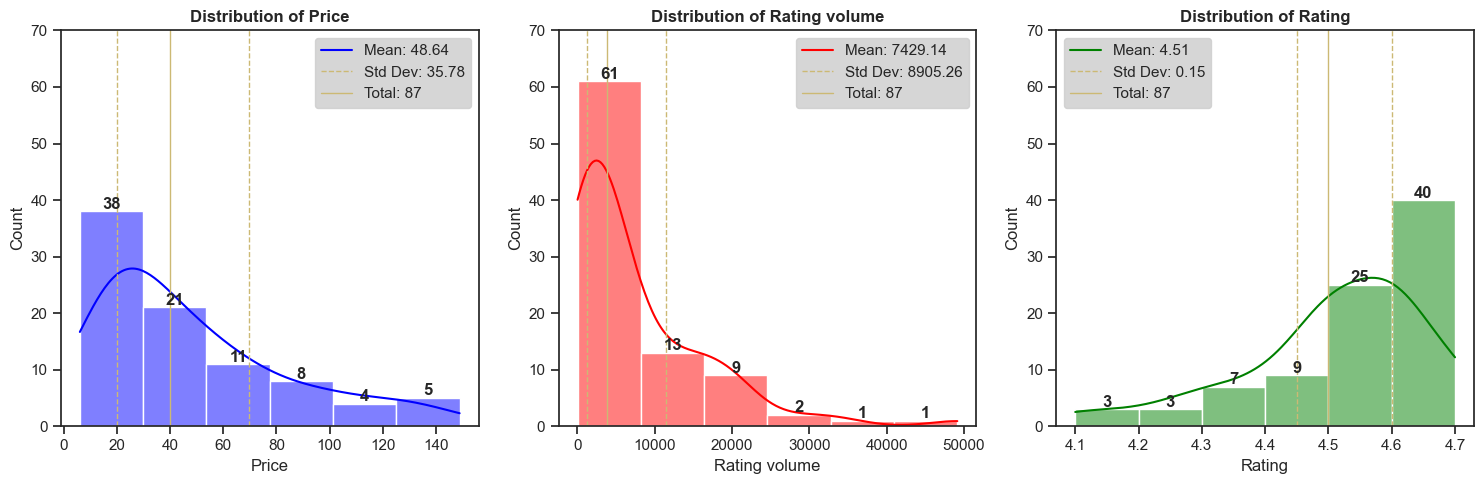

In [132]:
# Plot the distribution of Price, Rating Volume, and Rating columns
triple_distribution('price', 'rating_volume', 'rating', 6, range(0, 80, 10))

Key Takeaways:
- The distribution of price is right skewed, with the median price of $48. It shows that the majority of the best seller gaming mice are in the low and medium price category.
- The distribution of rating is left skewed, with the median rating of 4.5. It shows that the majority of the best seller gaming mice have a rating of 4.5 and above.
- The distribution of rating volume is right skewed, with the median rating volume of 7,429. Also the distribution of rating volume is more skewed than the distribution of price. About 30% of the best seller gaming mice have less rating volume than the median rating volume.

### Distribution Visualization of Price, Rating, and Rating Volume against Rank and Price Groupings

Defining a function to plot the distribution of price or rating or rating volume against rank and prices groupings. Then using the function to plot the distribution of price or rating or rating volume against rank and prices groupings.

#### Notes
- The Rank groupings is based on the rank of the best seller gaming mice, although the total product is 87 after cleaning the data, the rank groupings is still based on the top 100 list
- The Price groupings is based on the price of the best seller gaming mice. The Price groupings is divided into 3 categories, which are low, medium, and high price.

In [133]:
# Function to plot the distribution of 4 columns 2x2 with vertical lines for quartiles
def stacked_distribution(first, second, third, fourth, num_bins, y_ticks):
    plt.figure(figsize=(12, 10))
    # Create a list of the columns
    columns = [first, second, third, fourth]
    # Create a list of colors
    colors = ['blue', 'red', 'green', 'purple']

    for index, (column, color) in enumerate(zip(columns, colors), start=1):

        # Capitalize the column names
        column_text = column.replace('_', ' ').capitalize()

        # Plot
        plt.subplot(2, 2, index)  # (number of rows, number of columns, plot number)
        ax = sns.histplot(df[column], kde=True, bins=num_bins, color=color)
        # Annotate the bars with the count of data points
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 5), 
                        textcoords='offset points',
                        fontweight='bold')
            
        # Add vertical lines for quartiles
        q25, q50, q75 = df[column].quantile([0.25, 0.5, 0.75])
        ax.axvline(q25, color='y', linestyle='--', linewidth=1)
        ax.axvline(q50, color='y', linestyle='-', linewidth=1)
        ax.axvline(q75, color='y', linestyle='--', linewidth=1)    
        
        # Calculate mean, standard deviation, and total data points
        filtered_data = df[column].dropna()
        mean_value = df[column].mean()
        std_deviation = df[column].std()
        total_data_points = len(filtered_data)
        
        # Add legend with mean and standard deviation
        legend_text = [f"Mean: {mean_value:.2f}",
                       f"Std Dev: {std_deviation:.2f}",
                       f"Total: {total_data_points}"]
        legend = plt.legend(legend_text)
        legend.get_frame().set_facecolor((0.8, 0.8, 0.8, 0.8))
        # Set the title, x-label, and y-ticks
        plt.title(f"Distribution of {column_text}", fontweight='bold')
        plt.xlabel(f"{column_text}")
        plt.yticks(y_ticks)

    plt.tight_layout()
    plt.show()

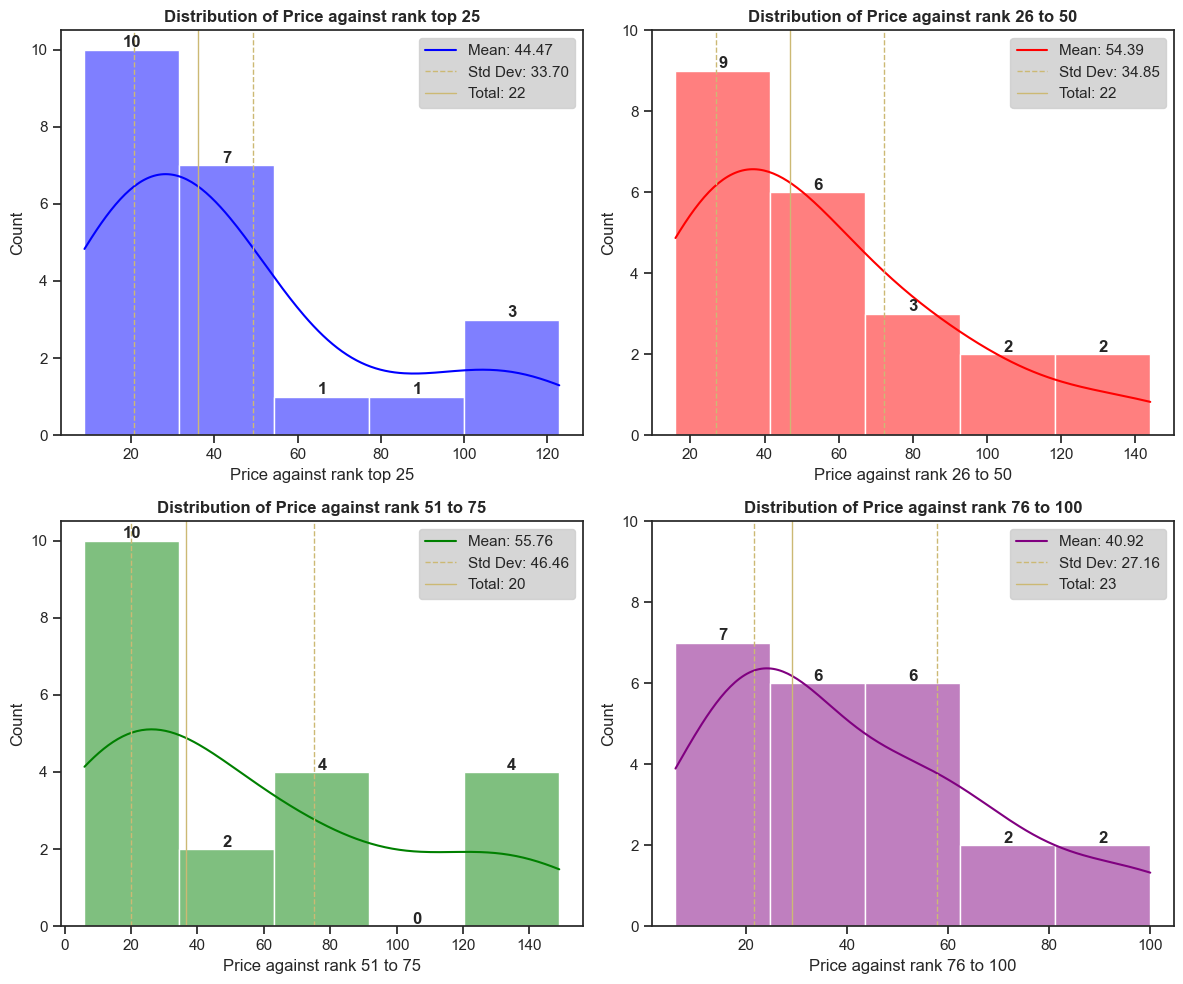

In [134]:
# Create new columns based on price against rank groups
df['price_against_rank_top_25'] = df.loc[df['rank'] <= 25, 'price']
df['price_against_rank_26_to_50'] = df[(df['rank'] > 25) & (df['rank'] <= 50)]['price']
df['price_against_rank_51_to_75'] = df[(df['rank'] > 50) & (df['rank'] <= 75)]['price']
df['price_against_rank_76_to_100'] = df[(df['rank'] > 75) & (df['rank'] <= 100)]['price']
# Plot the distribution of Price against Rank groups
stacked_distribution('price_against_rank_top_25', 'price_against_rank_26_to_50', 'price_against_rank_51_to_75', 'price_against_rank_76_to_100', 5, range(0, 12, 2))

Key Takeaways:
- All of the distribution of price against rank groupings is right skewed
- By its average price, rank groupings could be divided into 2 categories. One that have average price around $50 and other one that have average price around $30.
- The distribution of rank 51-75 standard deviation is the highest among all rank groupings. This could be caused as the data points is the lowest among all rank groupings.
- In general, the distribution of price against rank groupings is similar to the distribution of price in all best seller gaming mice.

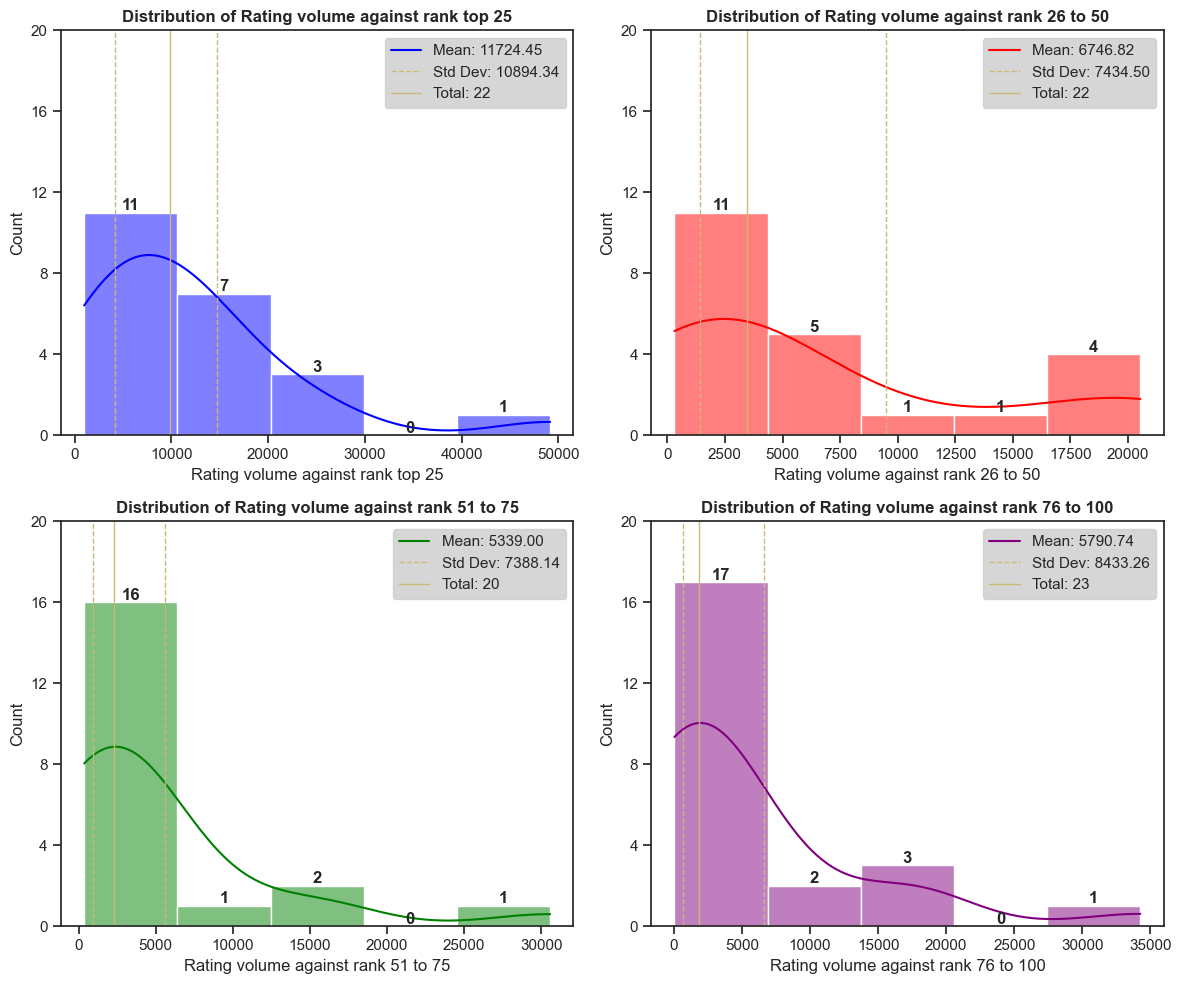

In [135]:
# Create new columns based on rating volume against rank groups
df['rating_volume_against_rank_top_25'] = df.loc[df['rank'] <= 25, 'rating_volume']
df['rating_volume_against_rank_26_to_50'] = df[(df['rank'] > 25) & (df['rank'] <= 50)]['rating_volume']
df['rating_volume_against_rank_51_to_75'] = df[(df['rank'] > 50) & (df['rank'] <= 75)]['rating_volume']
df['rating_volume_against_rank_76_to_100'] = df[(df['rank'] > 75) & (df['rank'] <= 100)]['rating_volume']
# Plot the distribution of Rating Volume against Rank groups
stacked_distribution('rating_volume_against_rank_top_25', 'rating_volume_against_rank_26_to_50', 'rating_volume_against_rank_51_to_75', 'rating_volume_against_rank_76_to_100', 5, range(0, 24, 4))

Key Takeaways:

- All of the distribution of rating volume against rank groupings is left skewed
- The top 50 rank groupings have the most softed distribution of rating volume against rank groupings. This could be caused as the top 50 rank groupings contain products with high rating volume.
- The rank 51-100 groupings have the most skewed distribution of rating volume against rank groupings. This could be caused as the rank 51-100 groupings contain products with low rating volume. Around 50% (33 products) have less than 5,000 rating volume.

Create a new columns of price groupings, which is divided into 3 categories, which are low, medium, and high price. Then using the function to plot the distribution of rating volume and rank against prices groupings. I personally think doing rating against price groupings is not necessary as most of the best seller gaming mice have a rating around of 4.5.

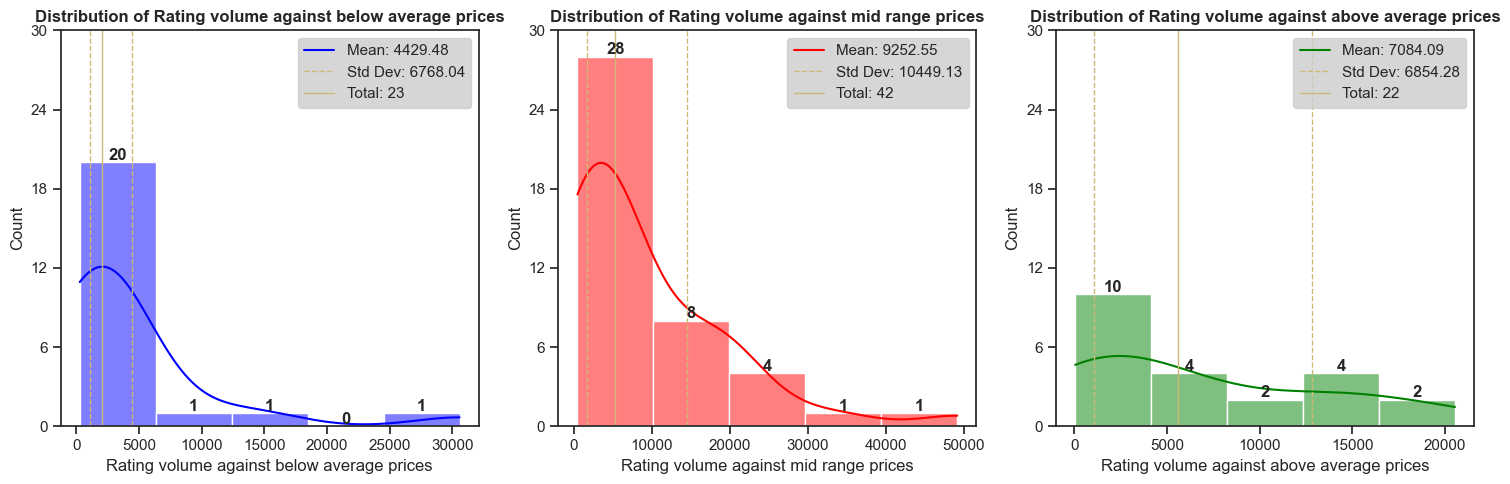

In [136]:
# Create percentile columns for price
price_25_percentile = df['price'].quantile(0.25)
price_75_percentile = df['price'].quantile(0.75)
# Create new columns based on rating volume against price groups
df['rating_volume_against_below_average_prices'] = df.loc[df['price'] <= price_25_percentile, 'rating_volume']
df['rating_volume_against_mid_range_prices'] = df[(df['price'] > price_25_percentile) & (df['price'] < price_75_percentile)]['rating_volume']
df['rating_volume_against_above_average_prices'] = df.loc[df['price'] >= price_75_percentile, 'rating_volume']
# Plot the distribution of Rating Volume against Price groups
triple_distribution('rating_volume_against_below_average_prices', 'rating_volume_against_mid_range_prices', 'rating_volume_against_above_average_prices', 5, range(0, 36, 6))

Key Takeaways:
- The distribution of rating volume against price groupings is right skewed.
- The distribution of low and medium price groupings is similar, while the distribution of high price groupings is less skewed.
- The high price groupings have the most softed distribution of rating volume against price groupings. This could be caused as the high price groupings have less products with low rating volume.

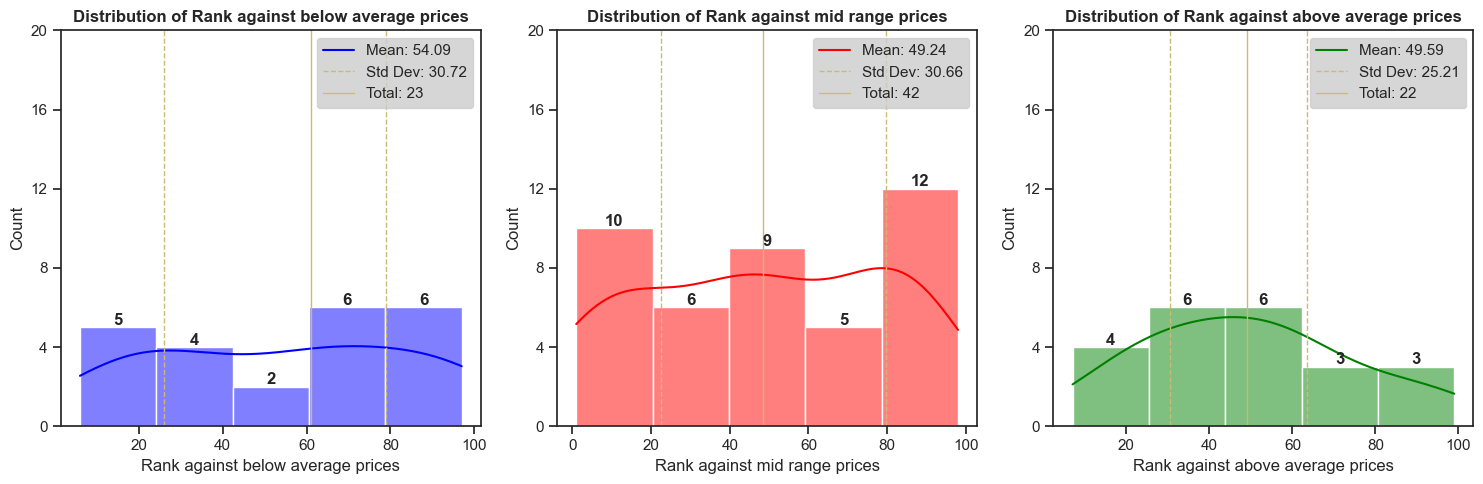

In [137]:
# Create percentile columns for price
price_25_percentile = df['price'].quantile(0.25)
price_75_percentile = df['price'].quantile(0.75)
# Create new columns based on rank against price groups
df['rank_against_below_average_prices'] = df.loc[df['price'] <= price_25_percentile, 'rank']
df['rank_against_mid_range_prices'] = df[(df['price'] > price_25_percentile) & (df['price'] < price_75_percentile)]['rank']
df['rank_against_above_average_prices'] = df.loc[df['price'] >= price_75_percentile, 'rank']
# Plot the distribution of Rank against Price groups
triple_distribution('rank_against_below_average_prices', 'rank_against_mid_range_prices', 'rank_against_above_average_prices', 5, range(0, 24, 4))

Key Takeaways:
- Only rank against high price groupings have a normal distribution of slightly skewed to the right.
- Other than that, all of the distribution have a bimodal distribution.
- Interestingly, the rank against low price groupings have higher mean rank. Meaning low price groupings contain product of lower rank.

### Regression Plots of Price, Rating, Rating Volume, and Rank against Each Other

Defining a function regression plot of price, rating, rating volume and rank against each other. Then using the function to plot the regression plot of price, rating, rating volume and rank against each other.

In [138]:
# Create Regressions of specific column against multiple other columns
def triple_regression(df, x, y1, y2, y3):
    plt.figure(figsize=(15, 5))
    # Create a list of the columns
    y_columns = [y1, y2, y3]
    # Create a list of colors
    colors = ['blue', 'red', 'green']
    # Loop through the columns and colors
    for index, (column, color) in enumerate(zip(y_columns, colors), start=1):

        # Capitalize the column names
        column_text = column.replace('_', ' ').capitalize()
        x_text = x.replace('_', ' ').capitalize()

        # Calculate the correlation coefficient
        correlation_coefficient = df[x].corr(df[column])

        # Regression plot
        ax = plt.subplot(1, 3, index)
        sns.regplot(x=x, y=column, data=df, color=color)
        # Set the title, x-label, and y-label
        plt.title(f'Regression of {column_text} on {x_text}', fontweight='bold')
        plt.xlabel(f"{x_text}")
        plt.ylabel(f"{column_text}")

        # Annotate with the correlation coefficient
        plt.annotate(f"r = {correlation_coefficient:.2f}",
                     xy=(0.05, 0.95), xycoords='axes fraction',
                     fontweight='bold', fontsize=12)

    plt.tight_layout()
    plt.show()

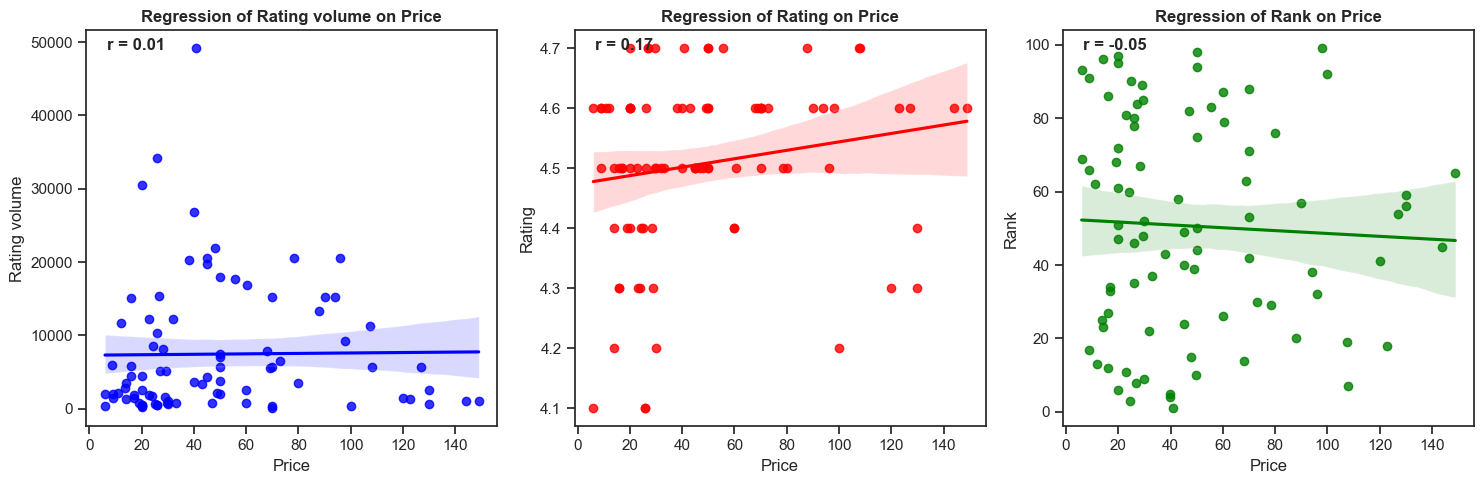

In [139]:
# Create regression plots of Price against Rating Volume, Rating, and Rank
triple_regression(df, 'price', 'rating_volume', 'rating', 'rank')

Key Takeaways:
- The correlation coefficient r of 0.01 between rating volume  and price suggests that there's almost no linear relationship between the two variables.
- With a correlation coefficient r of 0.17, there's a slight positive linear relationship between the product rating and its price. This suggests that higher-priced mice tend to have slightly better ratings, though the relationship is not strong.
- The negative correlation coefficient r of -0.05 between rank and price implies that there's a very weak negative linear relationship between the two variables.

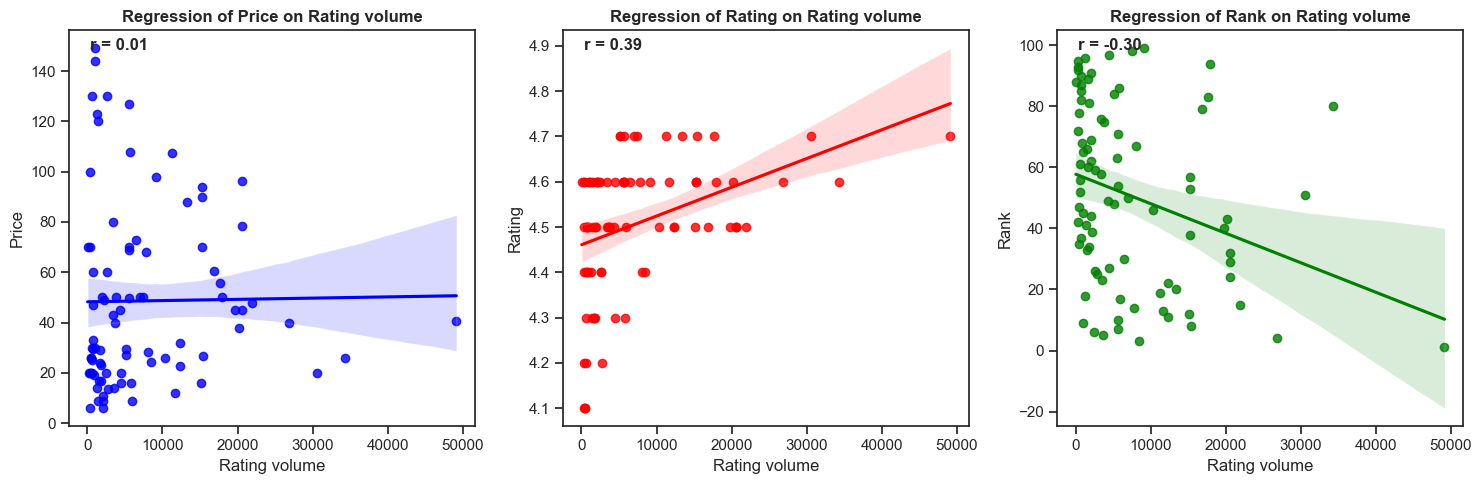

In [140]:
# Create regression plots of Rating Volume against Price, Rating, and Rank
triple_regression(df, 'rating_volume', 'price', 'rating', 'rank')

Key Takeaways:
- The correlation coefficient r of 0.01 between price and rating volume (used as a proxy for sales) indicates that there's almost no linear relationship between the two variables.
- With a correlation coefficient r of 0.39, there's a moderate positive linear relationship between product rating and rating volume. This suggests that products with higher ratings tend to have a higher number of ratings, implying that well-rated products sell more.
- A correlation coefficient r of -0.3 between rank and rating volume signifies a weak to moderate negative linear relationship. Considering that a smaller rank number (like rank 1) is superior to a larger one (like rank 100), this suggests that products with more ratings (or higher sales volume) tend to have a better rank. However, this relationship is not very strong.

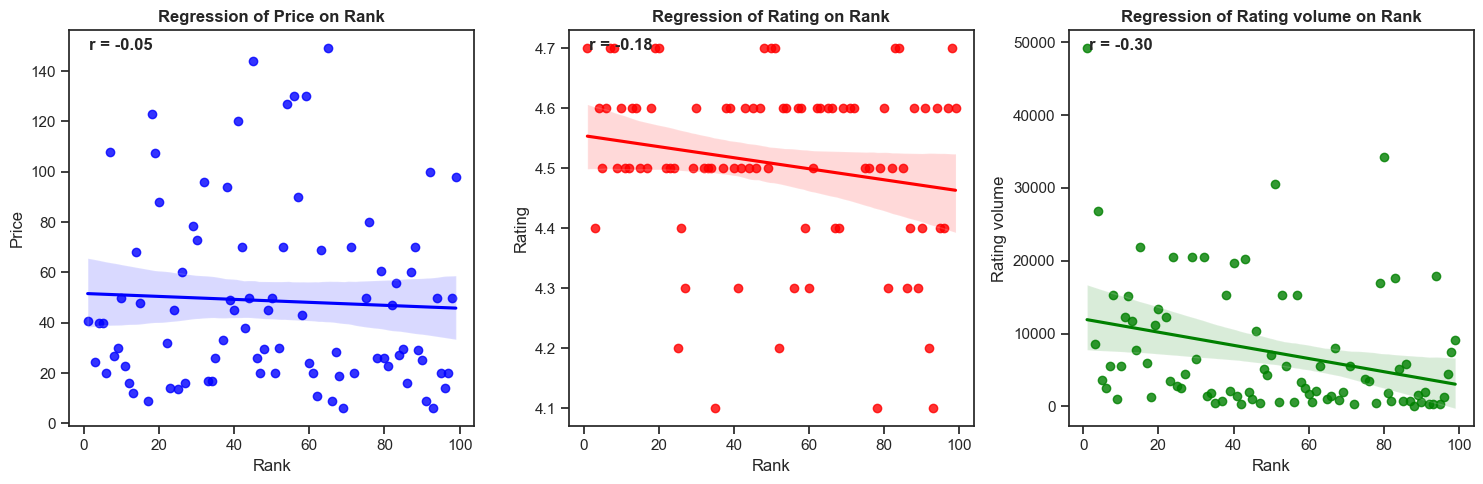

In [141]:
# Create regression plots of Rank against Price, Rating Volume, and Rating
triple_regression(df, 'rank', 'price', 'rating', 'rating_volume')

Key Takeaways:
- A correlation coefficient r of -0.05 between price and rank suggests a very weak negative linear relationship. This implies that, to a minor extent, products with a higher price might have a slightly better rank, but the relationship is weak and might not be very significant in practical scenarios.
- With a correlation coefficient r of -0.18, there's a weak negative relationship between product rating and its rank. This indicates that products with higher ratings (better quality or satisfaction) might tend to have a better rank, although the association is not very strong.
- A correlation coefficient r of -0.3 between rating volume and rank shows a weak to moderate negative linear relationship. Considering that a smaller rank number (like rank 1) is superior to a larger one (like rank 100), this suggests that products with more ratings (indicating potentially higher sales) tend to have a better rank. This relationship is more pronounced than the previous ones, but it's still not very strong.

### Cluster Analysis of Price against Rating, Rating Volume, and Rank

Defining a function to do cluster analysis of price against rating, rating volume and rank. Then using the function to do cluster analysis of price against rating, rating volume and rank.

In [142]:
# Create function to cluster and visualize
def cluster_and_visualize(df, col1, col2, n_clusters):
    
    # Extracting features and performing clustering
    X = df[[col1, col2]].values
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    df['cluster'] = kmeans.fit_predict(X)

    # Column Capitalization
    col1_text = col1.replace('_', ' ').capitalize()
    col2_text = col2.replace('_', ' ').capitalize()
    
    # Visualization
    plt.figure(figsize=(10,7))
    
    # Plotting clusters
    for cluster in range(n_clusters):
        mask = df['cluster'] == cluster
        plt.scatter(df[mask][col1], df[mask][col2], label=f'Cluster {cluster + 1}')
        
    # Plotting centroids
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
    # Add Silhouette Score
    silhouette_avg = silhouette_score(X, df['cluster'])
    # Set the title, x-label, y-label, and legend
    plt.title(f'Silhouette Score: {silhouette_avg:.2f}', fontweight='bold')
    plt.xlabel(col1_text)
    plt.ylabel(col2_text)
    plt.legend()
    plt.show()

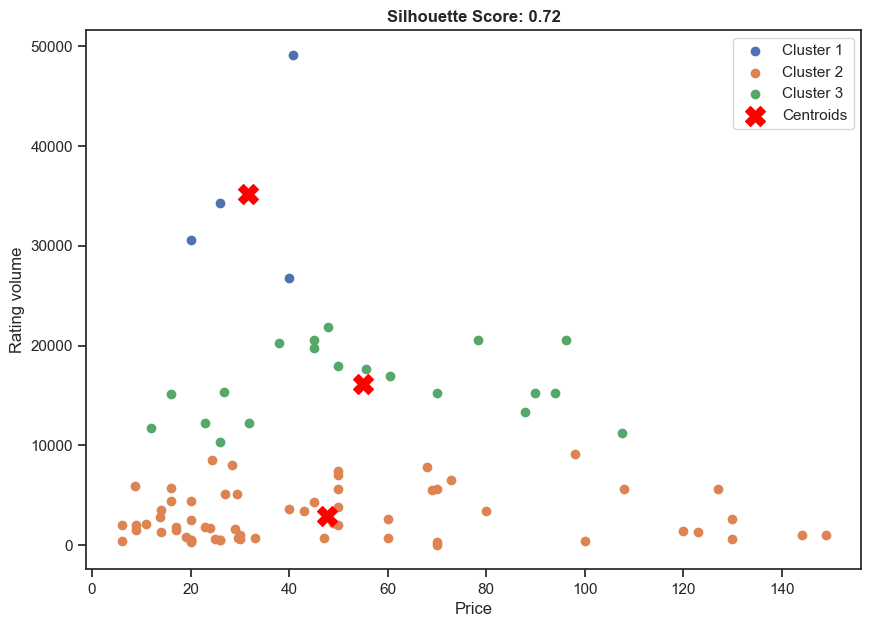

In [143]:
# Cluster and visualize Price against Rating Volume with 3 clusters
cluster_and_visualize(df, 'price', 'rating_volume', 3)

Key Takeaways:
- A silhouette score of 0.72 is relatively high, suggesting that the clusters formed are well-separated and distinct from each other.
- Cluster 1 contains products that are with highest rating volume but with prices ranging from 25th percentile to median of the best seller gaming mice.
- Cluster 2 contains products that are with medium rating volume.
- Cluster 3 contains products that are with lowest rating volume but with highest number of products in the best seller gaming mice.

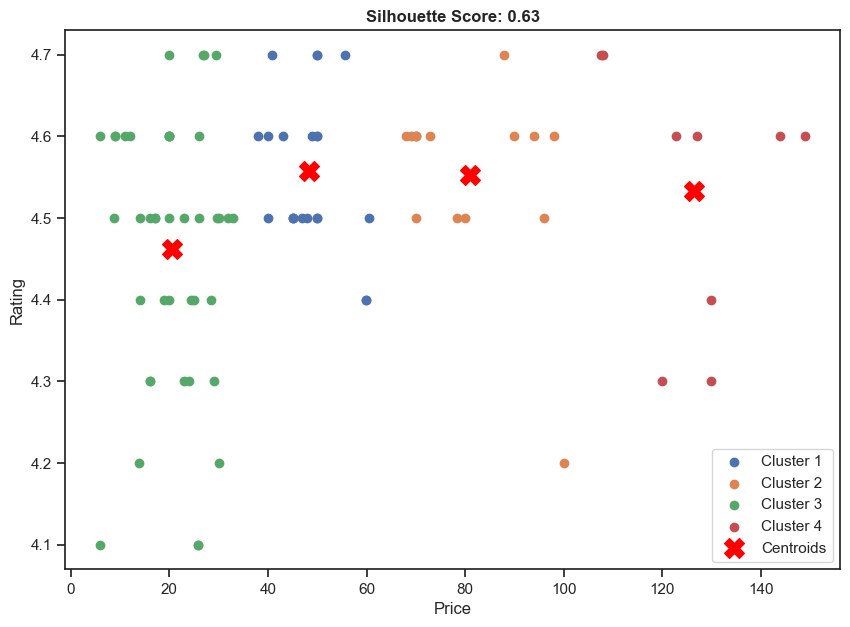

In [144]:
# Cluster and visualize Price against Rating with 4 clusters
cluster_and_visualize(df, 'price', 'rating', 4)

Key Takeaways:
- A silhouette score of 0.63 suggests that the clusters formed have a decent level of separation and distinction. While this score isn't extremely high, it's still a positive indication of the cluster coherence, showing that data points within each cluster are relatively closer to each other than to those in different clusters.
- Most of the cluster are based on the price groupings
- First cluster contains products with price from $40 to $60
- Second cluster contains products with price from $60 to $100
- Third cluster contains products with price lower than $40
- Fourth cluster contains products with price higher than $100

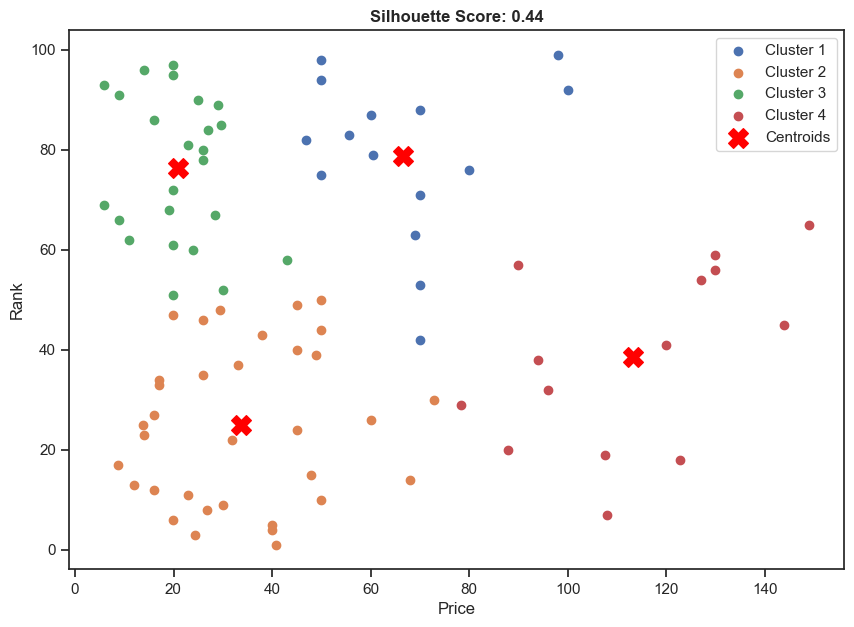

In [145]:
# Cluster and visualize Price against Rank with 4 clusters
cluster_and_visualize(df, 'price', 'rank', 4)

Key Takeaways:
- A silhouette score of 0.44 indicates a moderate level of separation between the clusters. While this score does suggest some level of distinction between the clusters, it's a sign that there might be some overlap or that data points within each cluster aren't as tightly grouped as one might hope.
- Cluster 1 low ranking products with price higher than median of the best seller gaming mice.
- Cluster 2 contains high ranking products with low and medium price.
- Cluster 3 contains low ranking products with low and medium price.
- Cluster 4 contains high ranking products with high price.

### Scatter Plots of Price, Rating, Rating Volume against Rank of Top 5 Brands

Defining a function to scatter plot of price, rating, rating volume against rank while also emphasizing the top 5 brands. Then using the function to scatter plot of price, rating, rating volume against rank while also emphasizing the top 5 brands.

In [146]:
# Create function to scatter plot top brands
def plot_top_brands(df, x_column, y_column, n_top_brands=5):
    # Get top n brands by value count
    top_brands = df['Brand'].value_counts().nlargest(n_top_brands).index

    # Filter dataframe to include only rows with top brands
    filtered_df = df[df['Brand'].isin(top_brands)]

    # Define custom color palette for the brands
    palette_dict = {
        'Logitech': 'blue',
        'Razer': 'green',
        'Corsair': 'black',
        'Redragon': 'red',
        'Trueque': 'yellow'
    }

    plt.figure(figsize=(18, 12))

    # Column Capitalization
    col1_text = x_column.replace('_', ' ').capitalize()
    col2_text = y_column.replace('_', ' ').capitalize()

    # Common scatterplot settings for the individual brand plots
    scatter_kws_individual = {
        's': 100,  # Size of scatter dots
        'edgecolor': 'gray',  # Edge color of scatter dots, set to gray to see white dots for Logitech
        'linewidth': 1,  # Width of the edge line of scatter dots
        'alpha': 0.3  # Making dots transparent
    }

    # Plot 1: General plot with all top brands
    plt.subplot(2, 3, 1)
    sns.scatterplot(data=filtered_df, x=x_column, y=y_column, hue='Brand', palette=palette_dict,
                    s=100, edgecolor='gray', linewidth=1)  # Keeping the dots opaque for the general plot
    # Add legend and set the title, x-label, and y-label
    plt.legend(title='Brand')
    plt.title(f"All Top Brands ({col1_text} v. {col2_text})", fontweight='bold')
    plt.xlabel(col1_text)
    plt.ylabel(col2_text)

    # Next n_top_brands plots: Emphasize on each brand
    for idx, brand in enumerate(top_brands, start=2):
        # Plot settings
        plt.subplot(2, 3, idx)
        sns.scatterplot(data=filtered_df, x=x_column, y=y_column, hue='Brand', palette=palette_dict, **scatter_kws_individual)
        plt.scatter(filtered_df[filtered_df['Brand'] == brand][x_column], filtered_df[filtered_df['Brand'] == brand][y_column], color=palette_dict[brand], label=brand, s=100, edgecolor='gray', linewidth=1)
        # Add legend and set the title, x-label, and y-label
        plt.legend(title='Brand')
        plt.title(f"Emphasis on {brand} ({col1_text} v. {col2_text})", fontweight='bold')
        plt.xlabel(col1_text)
        plt.ylabel(col2_text)

    plt.tight_layout()
    plt.show()

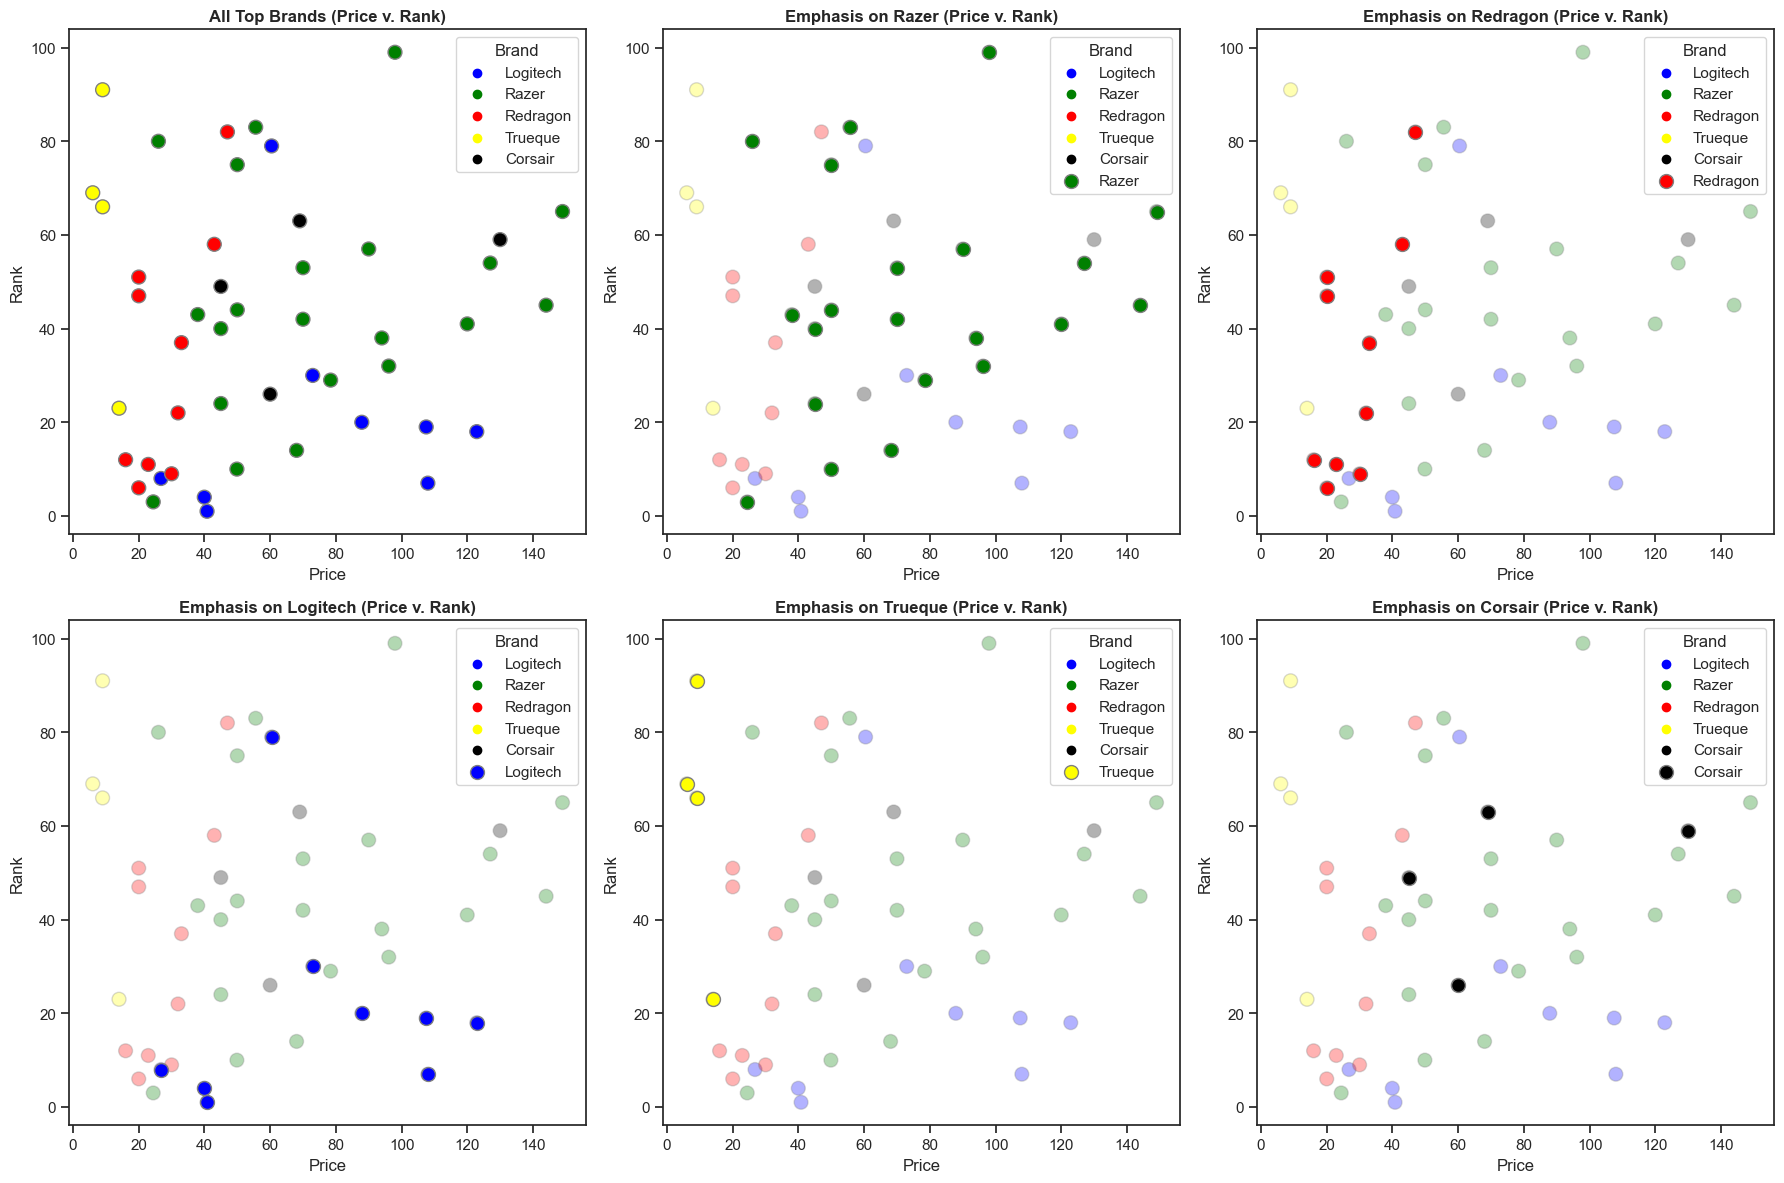

In [147]:
# Scatter plot top brands of Price against Rating Volume emphasizing on top 5 brands
plot_top_brands(df, 'price', 'rank')

Key Takeaways:
- Razer have the products with the most spread out price range. Also the most expensive product belong to Razer.
- Trueque and Redragon have the products that concentrated in the low price range.
- Although have smaller number of products, Corsair maintain significant spread in terms of price.
- Logitech products concentrated in high rank products. Could be grouped into 2 categories, which are high price and low price.

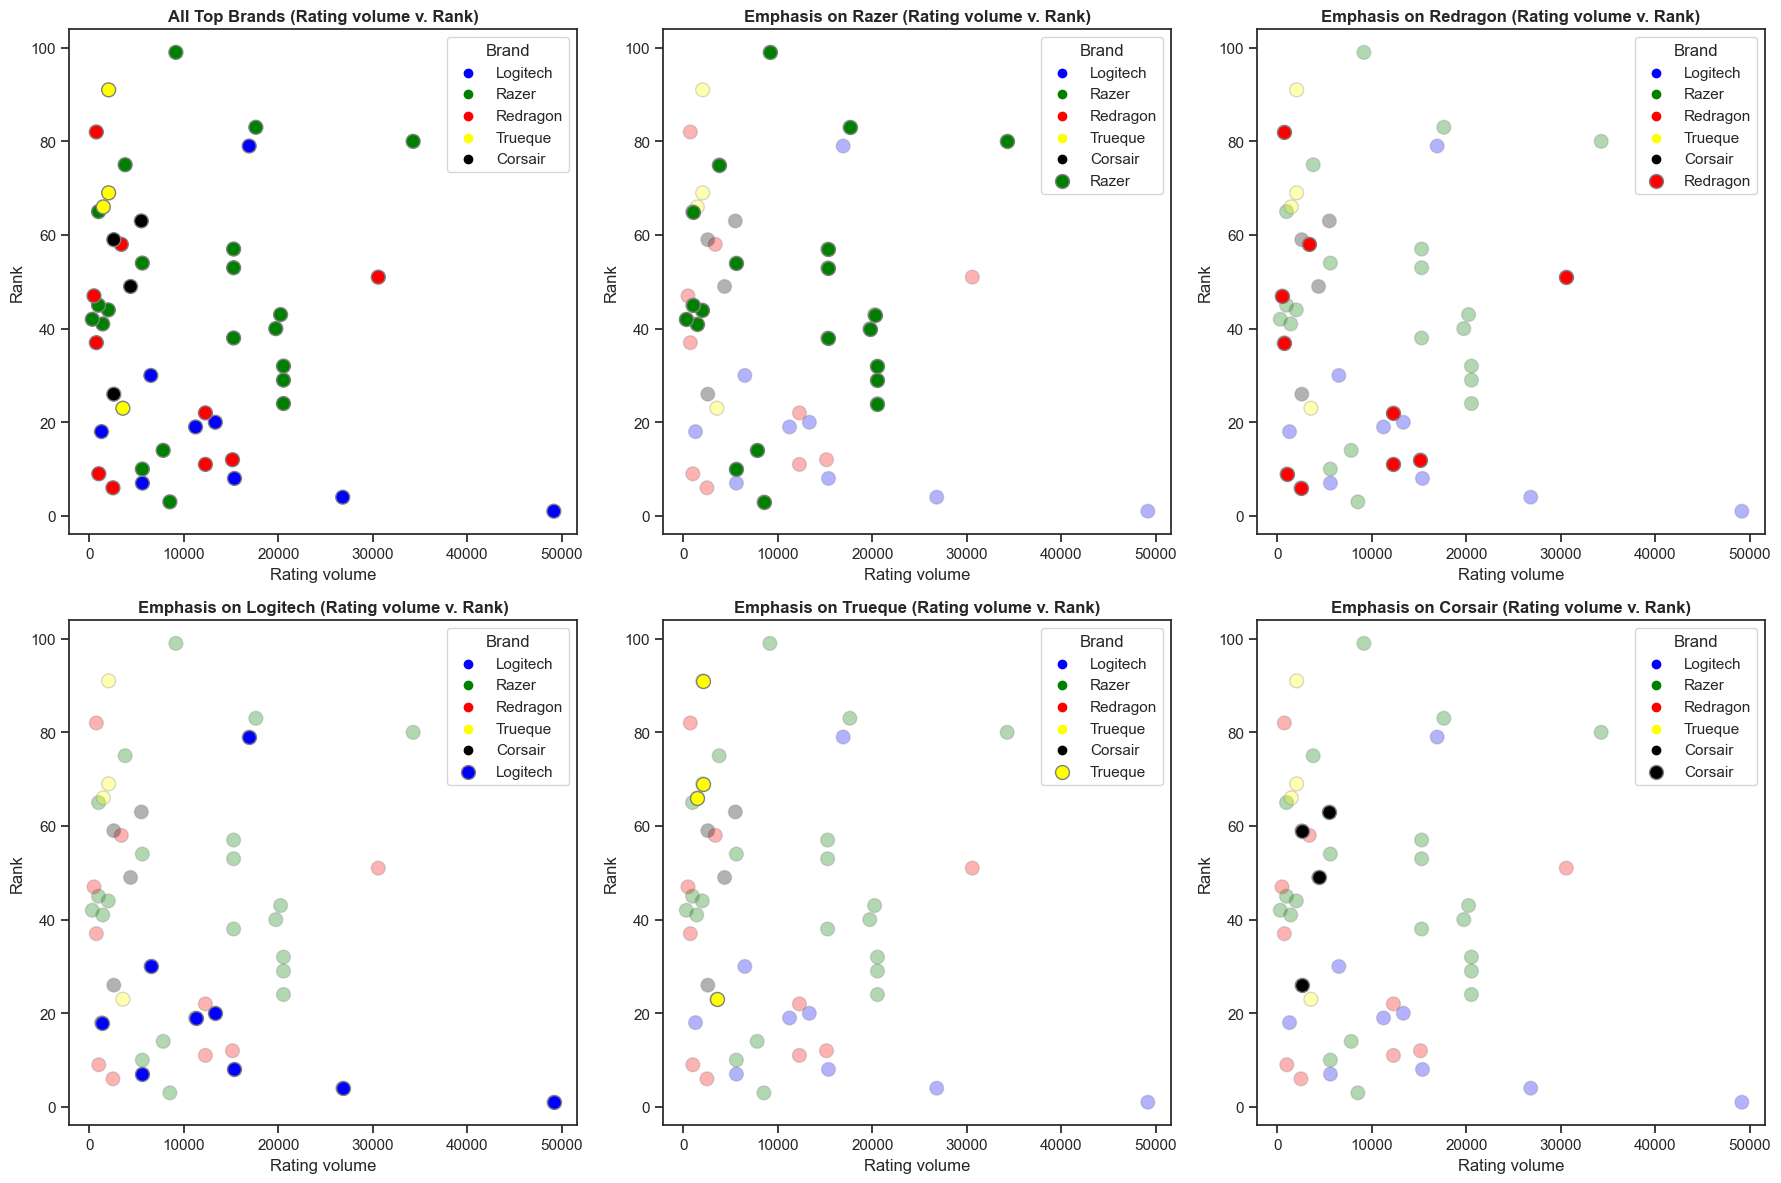

In [148]:
# Scatter plot top brands of Rating Volume against Rank emphasizing on top 5 brands
plot_top_brands(df, 'rating_volume', 'rank')

Key Takeaways:
- Logitech and Redragon have products concentrated in the higher rank area with rating volume spread out not concentrated in one area.
- Razer have the highest spread of rating volume and rank. Showing that Razer have products in all rank and rating volume.
- Trueque and Corsair products concentrated in the low rating volume.

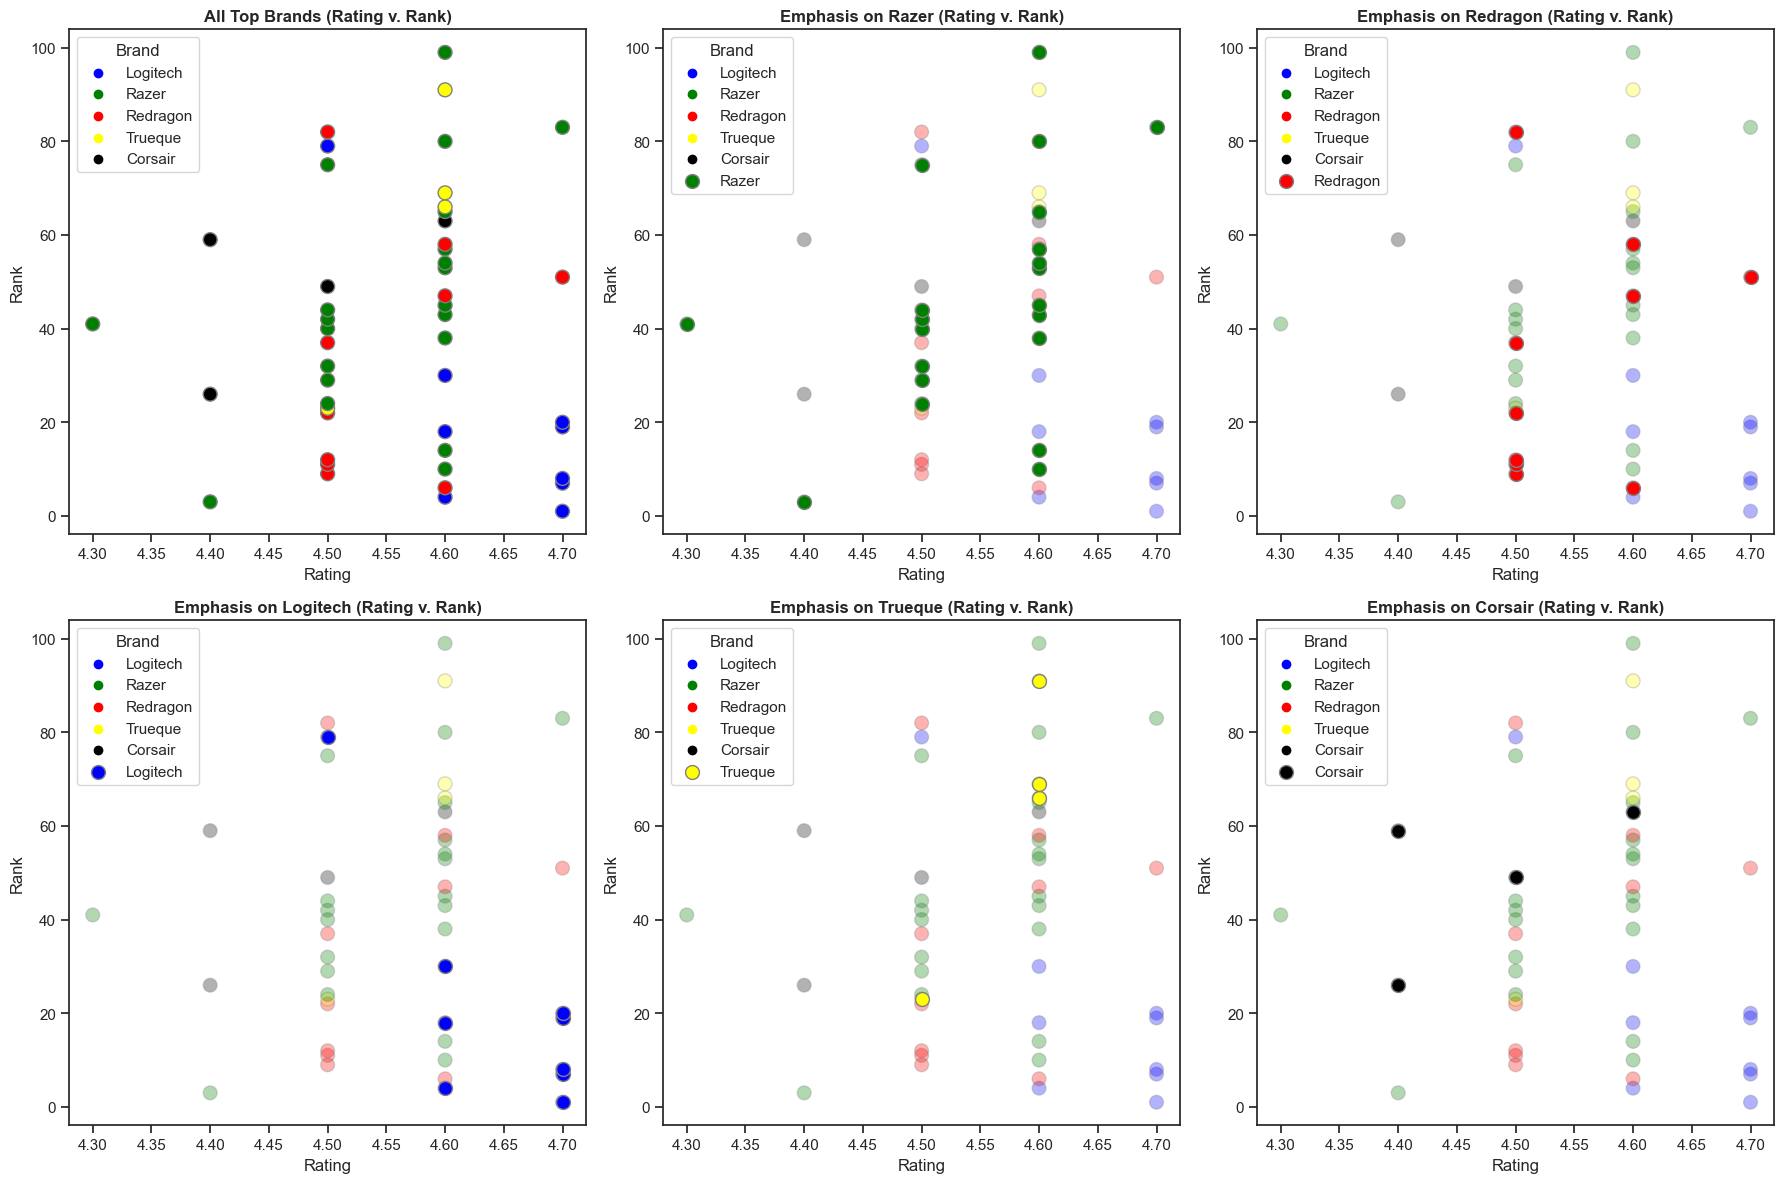

In [149]:
# Scatter plot top brands of Rating against Rank emphasizing on top 5 brands
plot_top_brands(df, 'rating', 'rank')

Key Takeaways:
- Razer have the highest spread of rating from lower rated to higher rated products.
- Trueque and Redragon have rating concentration around 4.5, noted Redragon have some data point of rated above 4.5.
- Even though only have 4 data points, Corsair have the two products rated lower than 4.5.
- Logitech have the highest concentration of rating around 4.6 and above.

### Scatter Plots of Price, Rating, Rating Volume against Rank of Price Groupings

Creating price category column based on the price of the product. Then defining a function to scatter plot of price, rating, rating volume against rank while also emphasizing the price groupings. Then using the function to scatter plot of price, rating, rating volume against rank while also emphasizing the price groupings.

In [150]:
# Create percentile variables from the price column
price_25_percentile = df['price'].quantile(0.25)
price_75_percentile = df['price'].quantile(0.75)

# Check if the 'price_category' column exists
if 'price_category' not in df.columns:
    # If not, create the 'price_category' column
    def categorize_price(price):
        if price <= price_25_percentile:
            return 'Low Price'
        elif price_25_percentile < price < price_75_percentile:
            return 'Mid Price'
        else:
            return 'High Price'

    # Create a new column 'price_category' based on the price
    df['price_category'] = df['price'].apply(categorize_price)

# Check for NaN values in the 'price_category' column
if df['price_category'].isna().any():
    # Handle missing values (e.g., drop them)
    df = df.dropna(subset=['price_category'])

In [151]:
# Create Function to plot column emphasizing price categories
def plot_price_categories(df, x_column, y_column, category_column='price_category'):
    plt.figure(figsize=(15, 12))

    # Define the color palette
    palette_colors = {
        'Low Price': 'blue',
        'Mid Price': 'orange',
        'High Price': 'green'
    }

    # Common scatterplot settings
    scatter_kws = {
        's': 100,  # Size of scatter dots
        'edgecolor': 'black',  # Edge color of scatter dots
        'linewidth': 1,  # Width of the edge line of scatter dots
        'alpha': 0.3  # Making dots transparent
    }
    # Get the categories from the palette colors dictionary
    categories = list(palette_colors.keys())
    
    # Column Capitalization
    col1_text = x_column.replace('_', ' ').capitalize()
    col2_text = y_column.replace('_', ' ').capitalize()

    # Plot 1 to 3: Emphasize on each category
    for idx, cat in enumerate(categories, start=1):
        # Plot settings
        plt.subplot(2, 2, idx)
        sns.scatterplot(data=df, x=x_column, y=y_column, hue=category_column, palette=palette_colors, **scatter_kws)
        plt.scatter(df[df[category_column] == cat][x_column], df[df[category_column] == cat][y_column], color=palette_colors[cat], label=cat, s=100, edgecolor='black', linewidth=1)
        # Add legend and set the title, x-label, and y-label
        plt.legend(title='Price Category')
        plt.title(f"Emphasis on {cat} ({col1_text} v. {col2_text})", fontweight='bold')
        plt.xlabel(col1_text)
        plt.ylabel(col2_text)

    # Plot 4: General plot with all categories
    plt.subplot(2, 2, 4)
    sns.scatterplot(data=df, x=x_column, y=y_column, hue=category_column, palette=palette_colors, s=100, edgecolor='black', linewidth=1)
    # Add Legend and set the title, x-label, and y-label
    plt.legend(title='Price Category')
    plt.title(f"All Categories ({col1_text} v. {col2_text})", fontweight='bold')
    plt.xlabel(col1_text)
    plt.ylabel(col2_text)

    plt.tight_layout()
    plt.show()

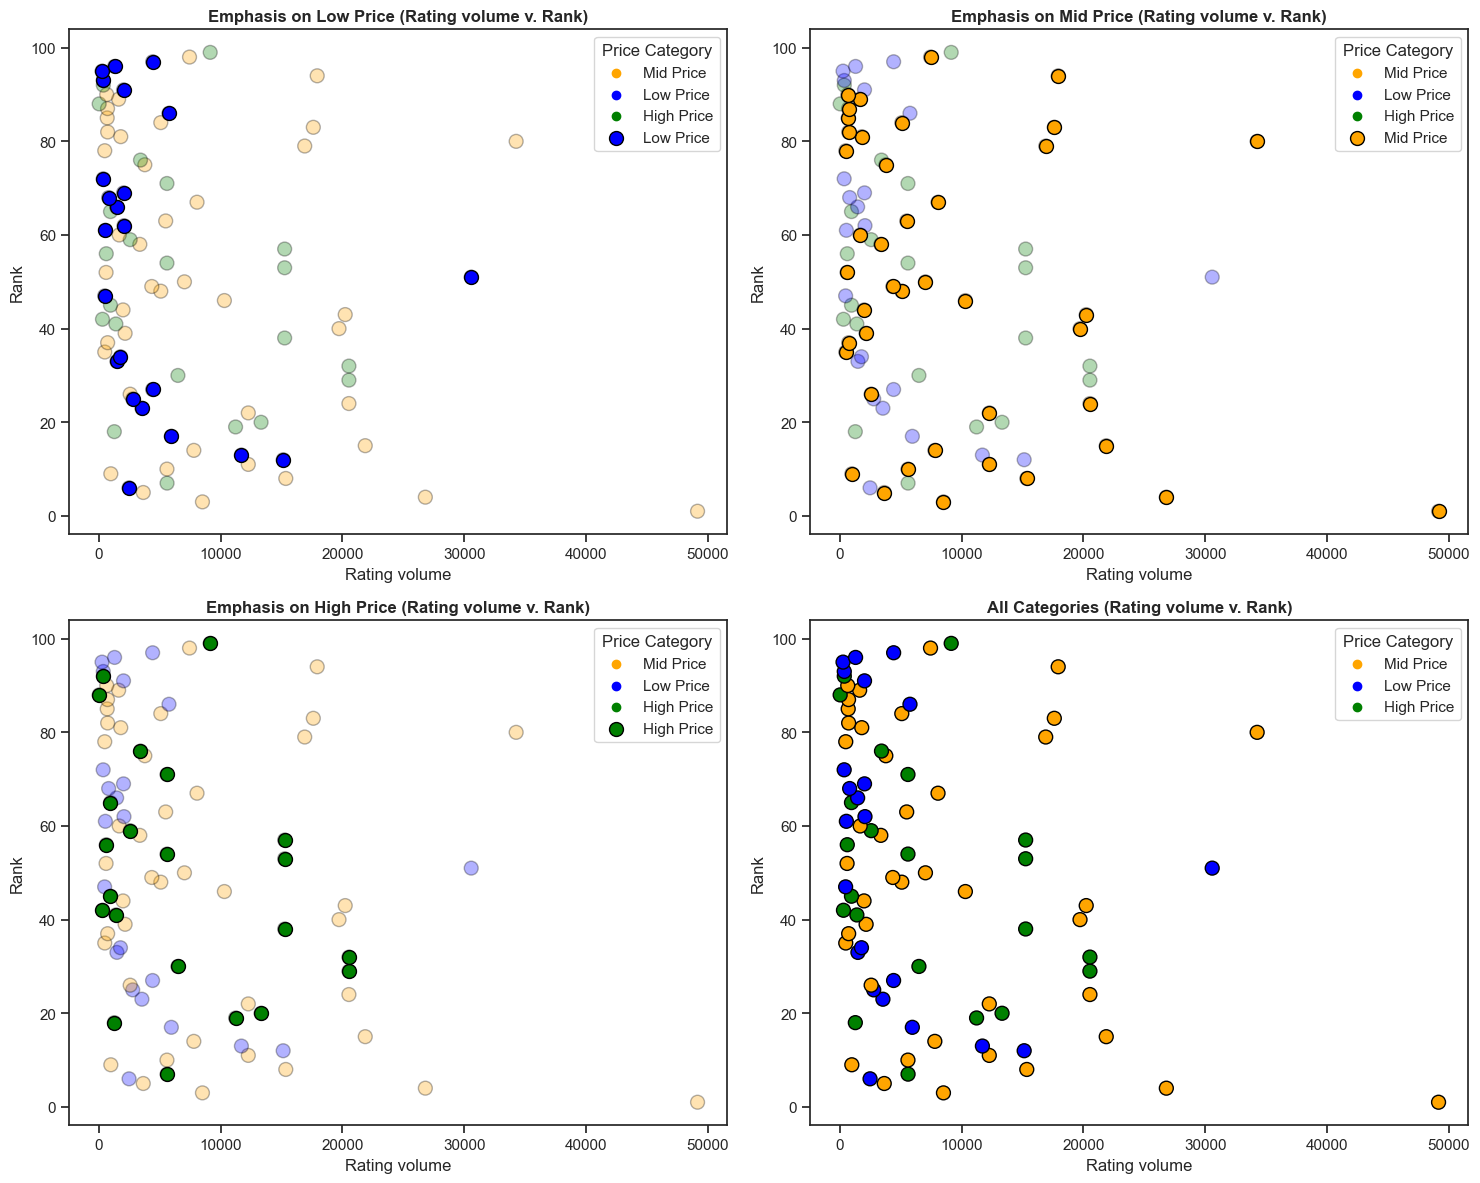

In [152]:
# Scatter plot emphasizing price categories of Rating Volume against Rank
plot_price_categories(df, 'rating_volume', 'rank')

Key Takeaways:
- The scatter plot of average price have the most spread out data points. This could be caused as the average price of the best seller gaming mice is $48.63, which is around the median of the best seller gaming mice.
- While the other scatter plot have more concentrated data points around rating volume lower than 10,000. This could be caused as the mean rating volume of the best seller gaming mice is 7,429.

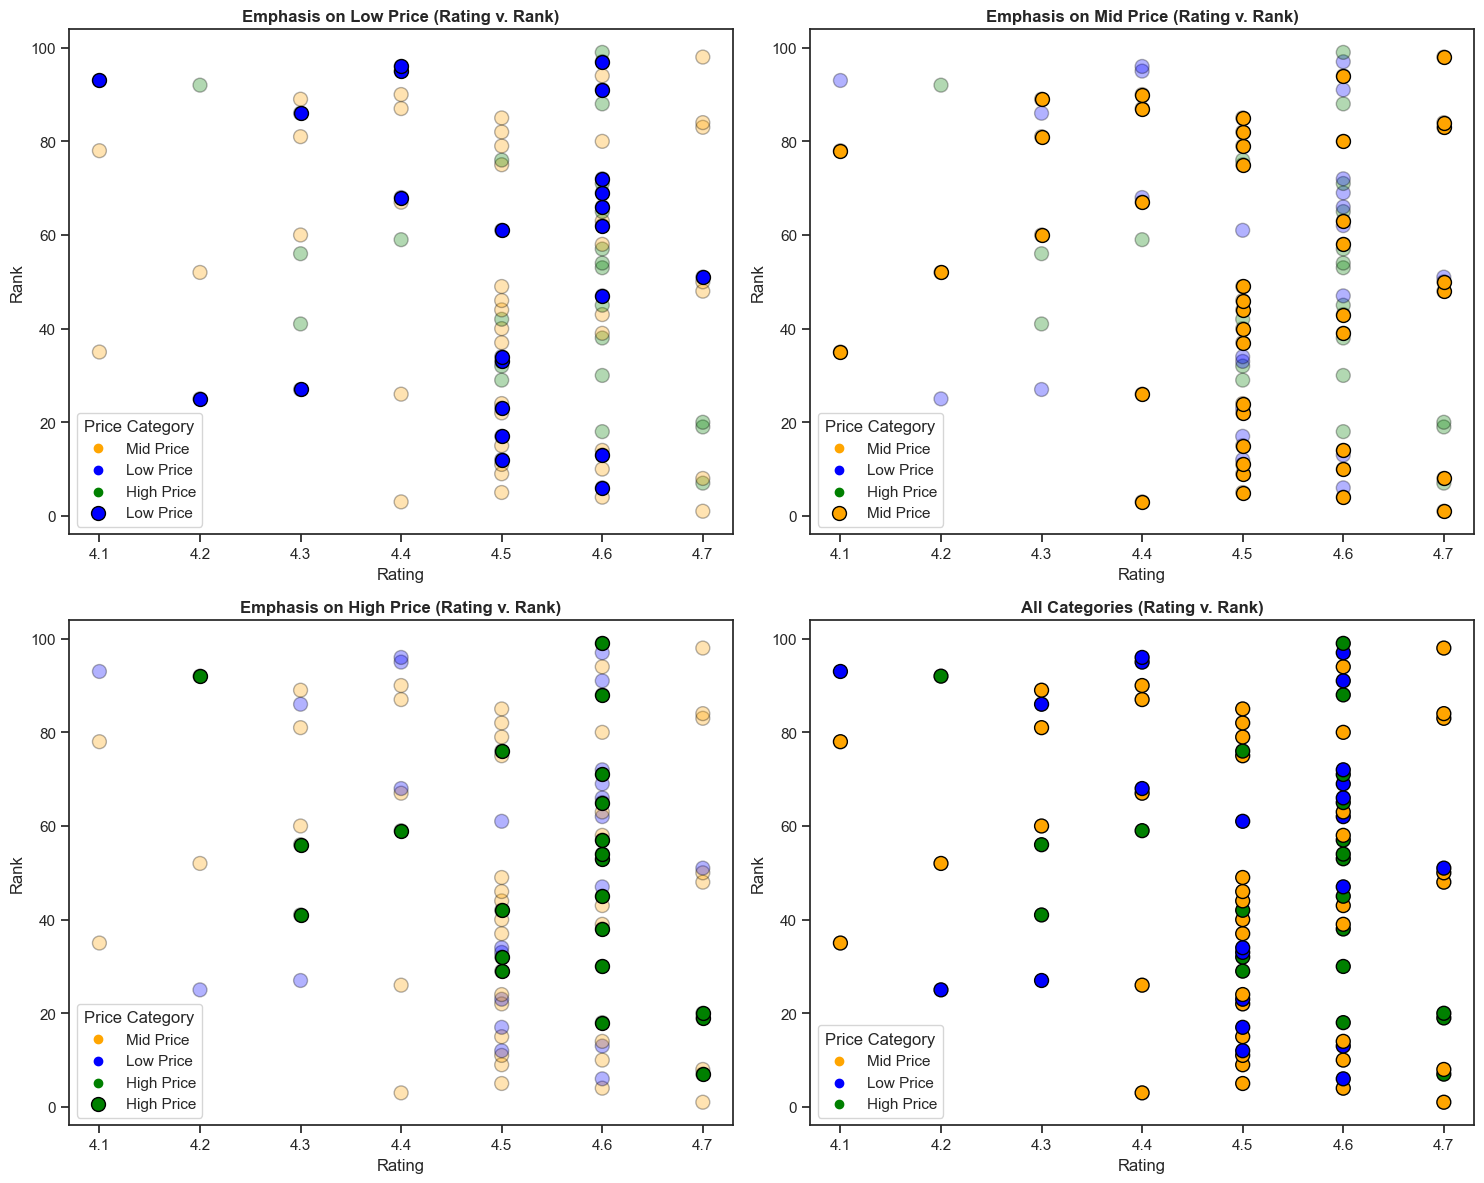

In [153]:
# Scatter plot emphasizing price categories of Rating against Rank
plot_price_categories(df, 'rating', 'rank')

Key Takeaways:
- These scatter plots does not show any significant pattern. Other than higher price products have alot products with 4.6 rating and above.

## Interesting Insights
- This data shows Razer as the most dominant brand in the best seller gaming mice. With the highest average price, while also second in term of average rating volume.
- Brand like Trueque and Redragon have the lowest average price. Could be a good alternative for people who want to buy gaming mice with low price.
- Logitech are the Top quality brand with the highest rank concentration, highest average rating. Even though also have the highest average rating volume.